In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [8]:
# Load the datasets
INFOTABLE_data = pd.read_csv('INFOTABLE_2023q4.tsv', delimiter='\t')
SUMMARYPAGE_data = pd.read_csv('SUMMARYPAGE.tsv', delimiter='\t')
COVERPAGE_data = pd.read_csv('COVERPAGE.tsv', delimiter='\t')

C:\Users\Aditya Saxena\AppData\Local\Temp\ipykernel_5536\1879900063.py:2: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  INFOTABLE_data = pd.read_csv('INFOTABLE_2023q4.tsv', delimiter='\t')


In [9]:
# Function to perform EDA on a dataset with missing value handling
def perform_eda(data, dataset_name):
    print(f"--- EDA for {dataset_name} ---")
    print("Shape of the data:", data.shape)
    print("\nData Types:\n", data.dtypes)
    print("\nDescriptive Statistics:\n", data.describe(include='all'))

    # Identify categorical columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        print(f"\nValue Counts for {col}:\n", data[col].value_counts())

    # Histograms for each feature
    data.hist(bins=15, figsize=(15, 10), edgecolor='black')
    plt.suptitle(f"Histograms of Numerical Features in {dataset_name}")
    plt.show()

    # Correlation plot (numerical columns only)
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for {dataset_name}")
    plt.show()

    # Encode categorical variables for clustering and correlation analysis
    for col in categorical_cols:
        data[col] = data[col].astype(str)
        data[col] = LabelEncoder().fit_transform(data[col])

    # Standardize the data (only numerical columns) for clustering
    scaler = StandardScaler()
    numerical_data = data.select_dtypes(include=[np.number])

    # Impute missing values in numerical data
    imputer = SimpleImputer(strategy="mean")
    imputed_data = imputer.fit_transform(numerical_data)

    # Scale the imputed data
    scaled_data = scaler.fit_transform(imputed_data)

    # PCA for dimensionality reduction to visualize clusters
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
    clusters = kmeans.fit_predict(scaled_data)

    # Plot clustering results
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f"Clustering Plot with PCA for {dataset_name}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Cluster Label')
    plt.show()

--- EDA for INFOTABLE_data ---
Shape of the data: (2886468, 15)

Data Types:
 ACCESSION_NUMBER        object
INFOTABLE_SK             int64
NAMEOFISSUER            object
TITLEOFCLASS            object
CUSIP                   object
FIGI                    object
VALUE                    int64
SSHPRNAMT                int64
SSHPRNAMTTYPE           object
PUTCALL                 object
INVESTMENTDISCRETION    object
OTHERMANAGER            object
VOTING_AUTH_SOLE         int64
VOTING_AUTH_SHARED       int64
VOTING_AUTH_NONE         int64
dtype: object

Descriptive Statistics:
             ACCESSION_NUMBER  INFOTABLE_SK NAMEOFISSUER TITLEOFCLASS  \
count                2886468  2.886468e+06      2886429      2886297   
unique                  7519           NaN       147084        21206   
top     0001062993-23-020781           NaN   ISHARES TR          COM   
freq                   64943           NaN        99952      1323068   
mean                     NaN  9.217559e+07          NaN  

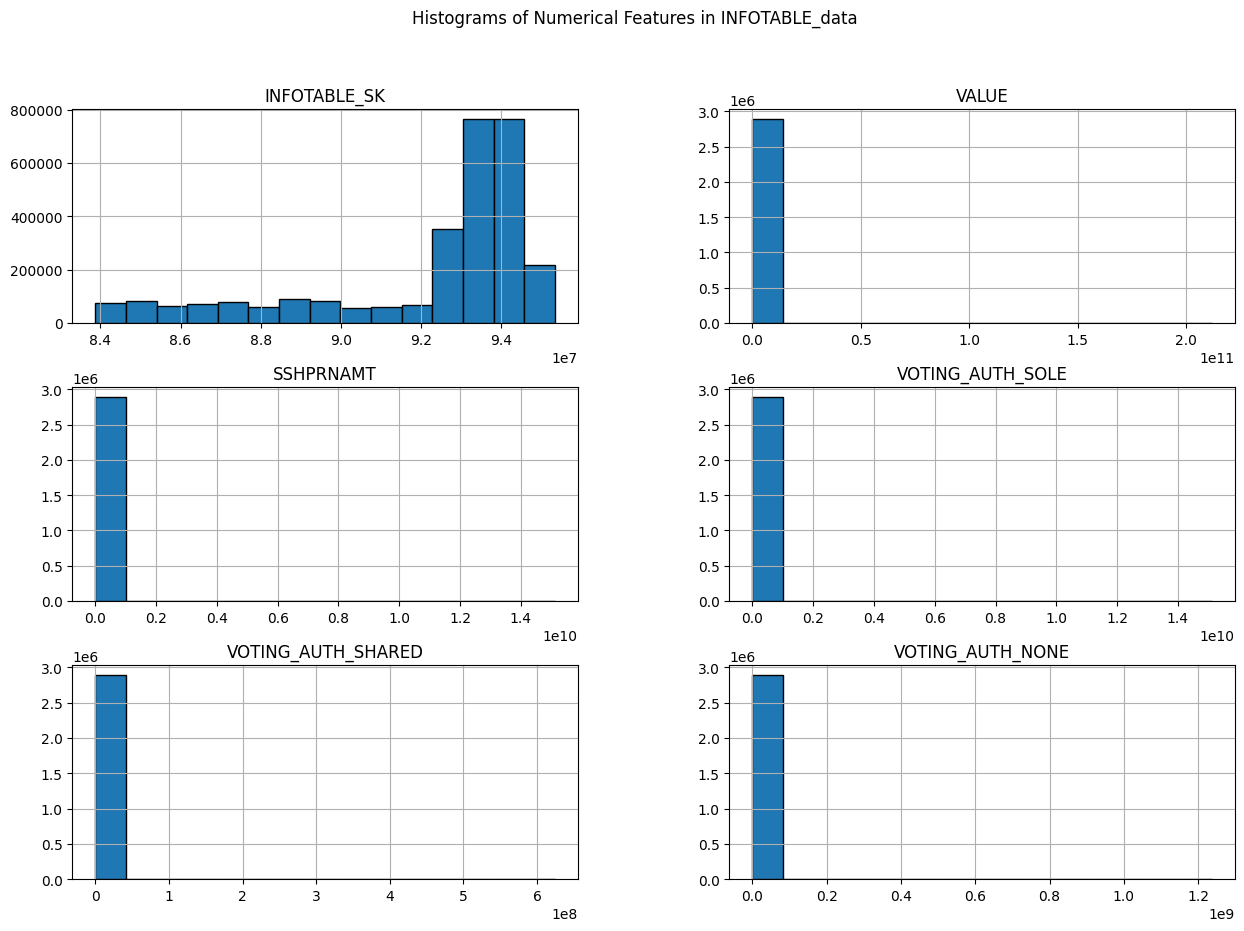

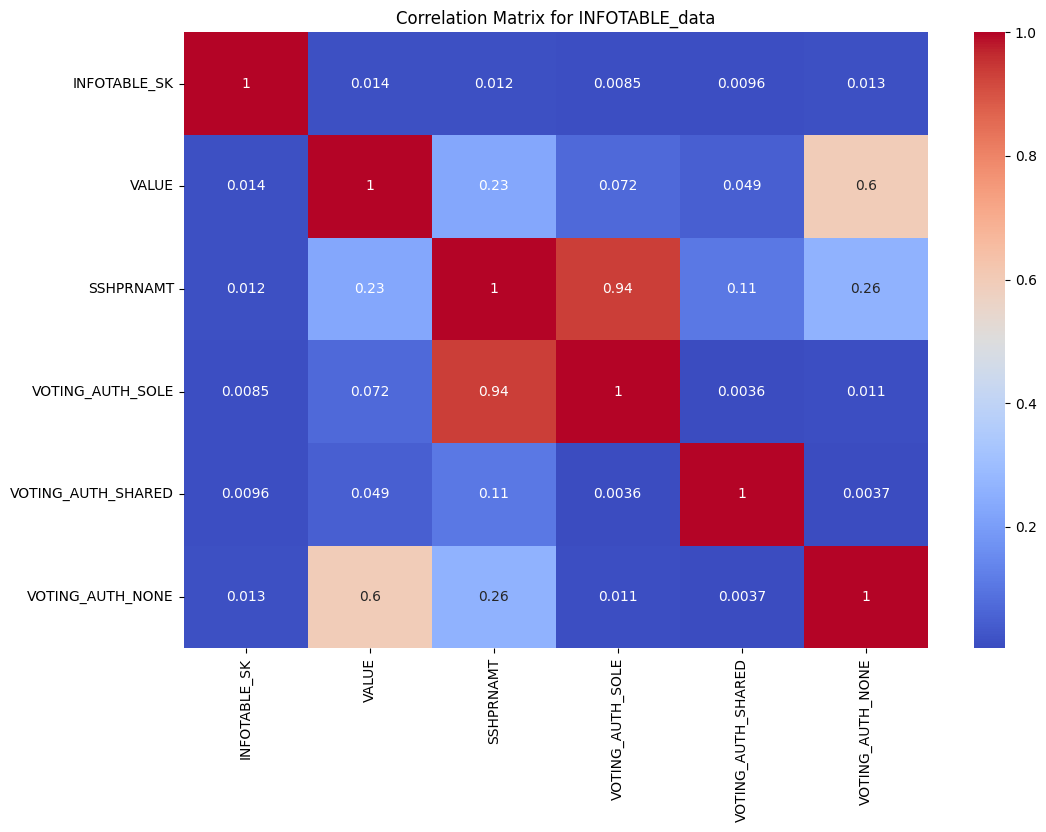

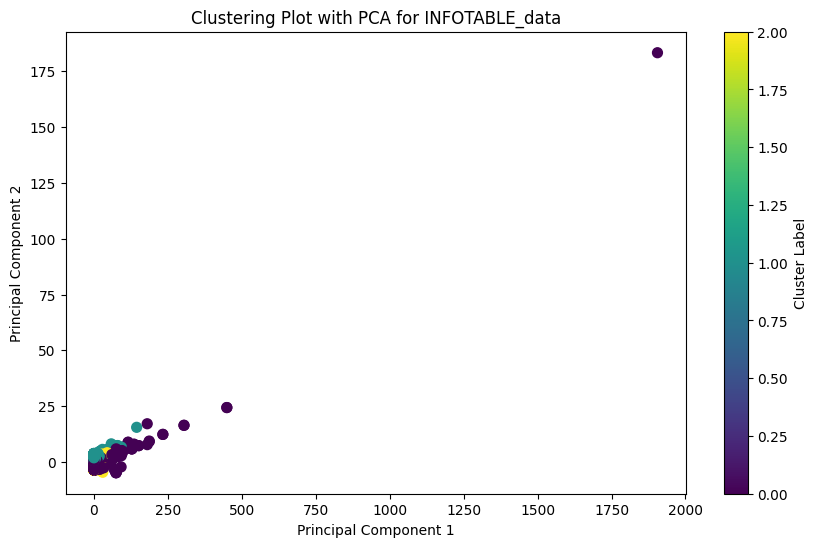

--- EDA for SUMMARYPAGE_data ---
Shape of the data: (7624, 5)

Data Types:
 ACCESSION_NUMBER              object
OTHERINCLUDEDMANAGERSCOUNT     int64
TABLEENTRYTOTAL                int64
TABLEVALUETOTAL                int64
ISCONFIDENTIALOMITTED         object
dtype: object

Descriptive Statistics:
             ACCESSION_NUMBER  OTHERINCLUDEDMANAGERSCOUNT  TABLEENTRYTOTAL  \
count                   7624                 7624.000000      7624.000000   
unique                  7624                         NaN              NaN   
top     0001860698-23-000005                         NaN              NaN   
freq                       1                         NaN              NaN   
mean                     NaN                    0.424711       416.053253   
std                      NaN                    2.130123      3021.459731   
min                      NaN                    0.000000         0.000000   
25%                      NaN                    0.000000        30.000000   
50%   

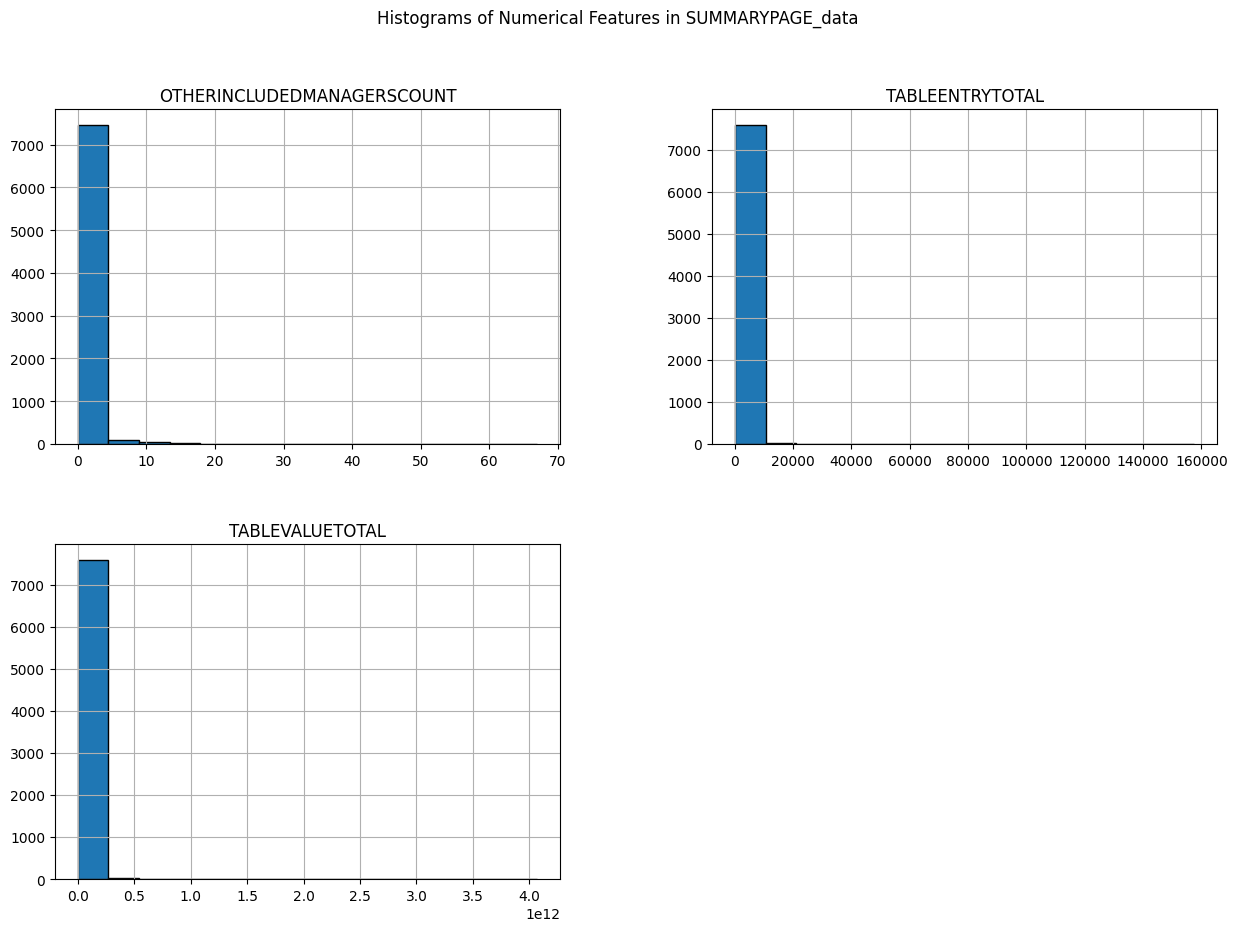

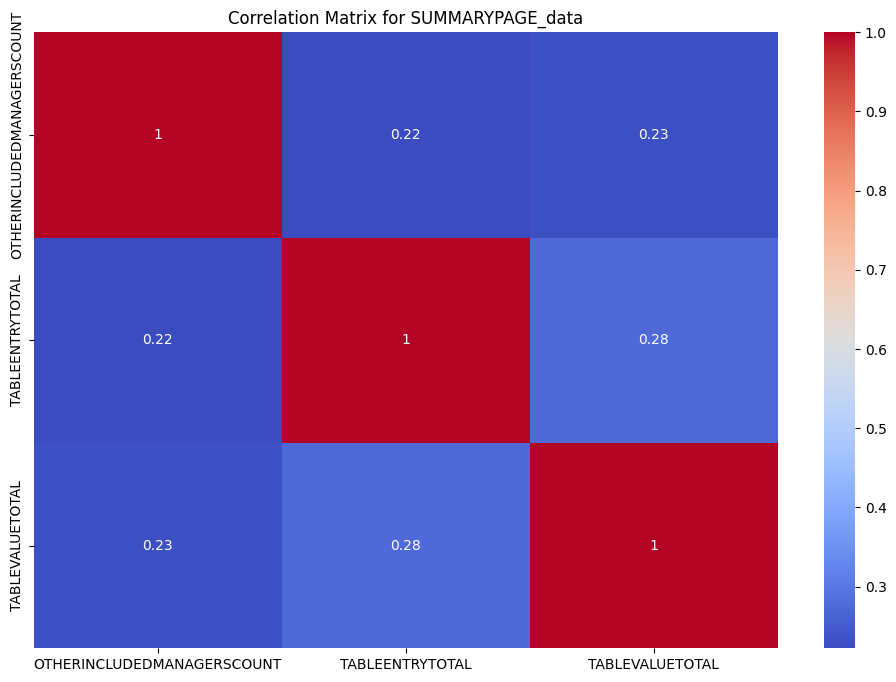

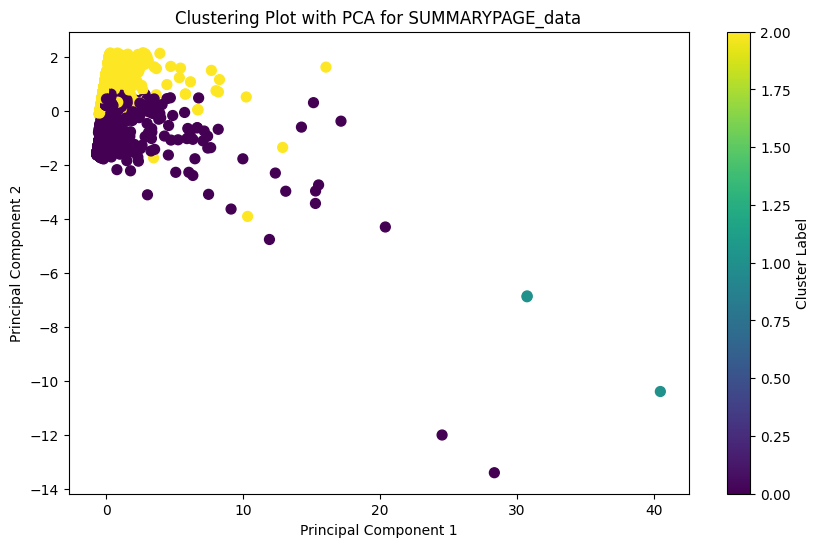

--- EDA for COVERPAGE_data ---
Shape of the data: (9196, 21)

Data Types:
 ACCESSION_NUMBER                 object
REPORTCALENDARORQUARTER          object
ISAMENDMENT                      object
AMENDMENTNO                     float64
AMENDMENTTYPE                    object
CONFDENIEDEXPIRED                object
DATEDENIEDEXPIRED                object
DATEREPORTED                     object
REASONFORNONCONFIDENTIALITY      object
FILINGMANAGER_NAME               object
FILINGMANAGER_STREET1            object
FILINGMANAGER_STREET2            object
FILINGMANAGER_CITY               object
FILINGMANAGER_STATEORCOUNTRY     object
FILINGMANAGER_ZIPCODE            object
REPORTTYPE                       object
FORM13FFILENUMBER                object
CRDNUMBER                       float64
SECFILENUMBER                    object
PROVIDEINFOFORINSTRUCTION5       object
ADDITIONALINFORMATION            object
dtype: object

Descriptive Statistics:
             ACCESSION_NUMBER REPORTCALENDAROR

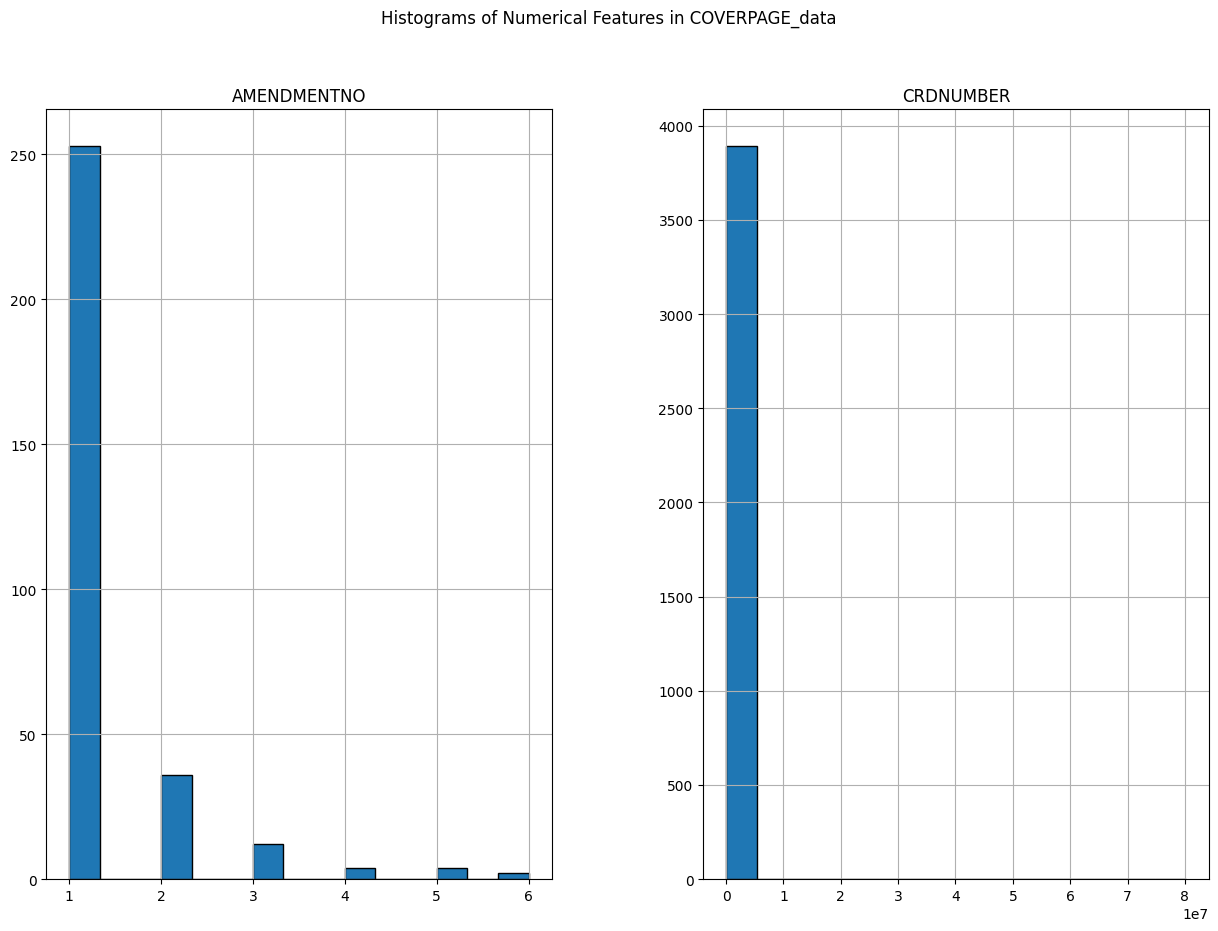

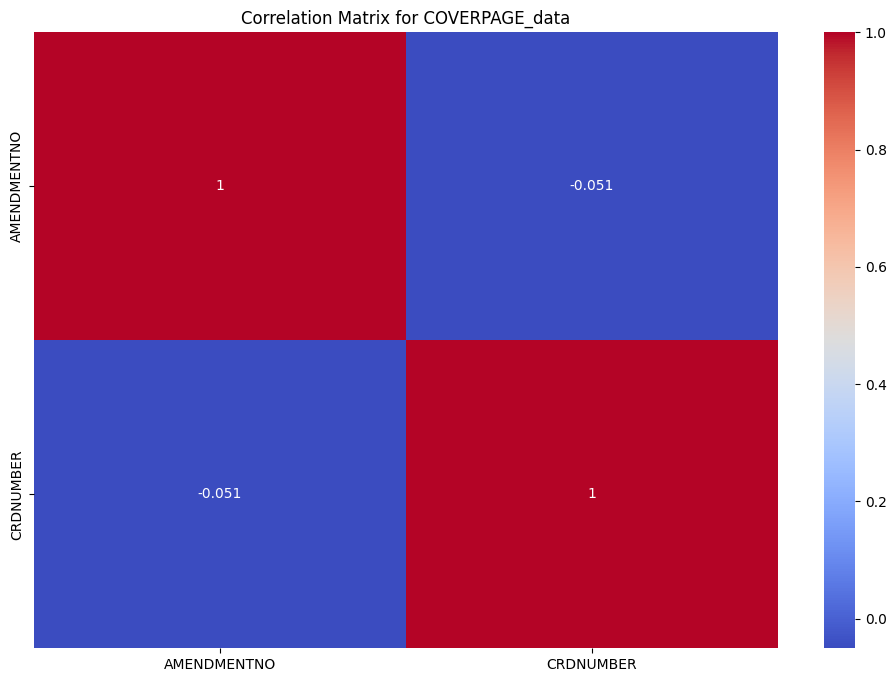

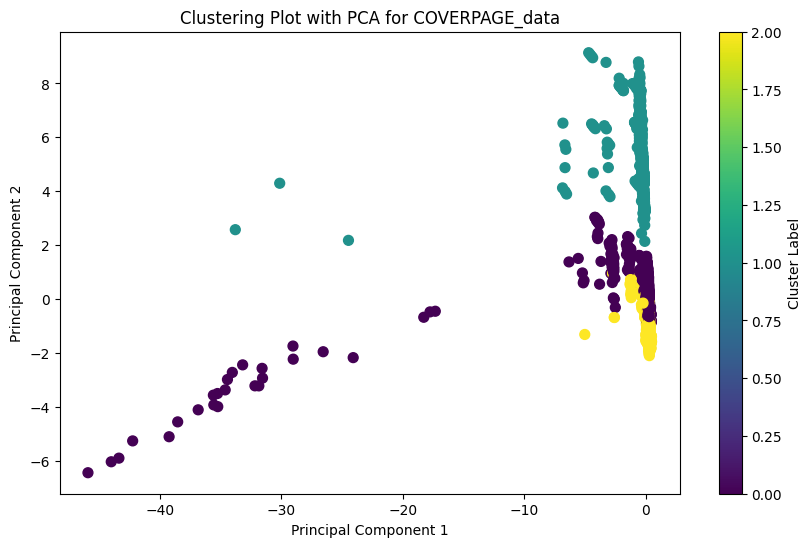

In [10]:
# Perform EDA on each dataset
perform_eda(INFOTABLE_data, "INFOTABLE_data")
perform_eda(SUMMARYPAGE_data, "SUMMARYPAGE_data")
perform_eda(COVERPAGE_data, "COVERPAGE_data")